This notebook contains functionality to perform the following:

Explore and visualize the arabidopsis chromosomal data. This includes both files provided, `athal_starr_hidra.tsv` and `athal_istarr_hidra.tsv`. We look at both sequence features and the target distribution.

In [ ]:
# mount google drive

from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/Shareddrives/NRC_Amii_Agronomics_Project/nrc-ml-plant-genomics/'

Mounted at /content/drive
/content/drive/Shareddrives/NRC_Amii_Agronomics_Project/nrc-ml-plant-genomics


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from collections import Counter
import time

%matplotlib inline

In [ ]:
# load in the first 10 rows of each dataframe to get oriented

t0 = time.time()
df_starr = pd.read_csv('data/raw/athal_starr_hidra.tsv', sep="\t", header=None, nrows=10)
df_istarr = pd.read_csv('data/raw/athal_istarr_hidra.tsv', sep="\t", header=None, nrows=10)
print(time.time()-t0)

3.6285159587860107


In [ ]:
print(df_starr.shape)
df_starr.head()

(10, 8)


,0,1,2,3,4,5,6,7
0,Chr1,0,145,CCCTAAACCCTAAACCCTAAACCCTAAACCTCTGAATCCTTAATCC...,15,46,0.34,1.47
1,Chr1,5,150,AACCCTAAACCCTAAACCCTAAACCTCTGAATCCTTAATCCCTAAA...,15,46,0.34,1.47
2,Chr1,10,155,TAAACCCTAAACCCTAAACCTCTGAATCCTTAATCCCTAAATCCCT...,15,46,0.34,1.47
3,Chr1,15,160,CCTAAACCCTAAACCTCTGAATCCTTAATCCCTAAATCCCTAAATC...,16,46,0.36,1.47
4,Chr1,20,165,ACCCTAAACCTCTGAATCCTTAATCCCTAAATCCCTAAATCTTTAA...,16,46,0.36,1.47


In [ ]:
print(df_istarr.shape)
df_istarr.head()

(10, 8)


,0,1,2,3,4,5,6,7
0,Chr1,0,145,CCCTAAACCCTAAACCCTAAACCCTAAACCTCTGAATCCTTAATCC...,18,6,0.37,0.30
1,Chr1,5,150,AACCCTAAACCCTAAACCCTAAACCTCTGAATCCTTAATCCCTAAA...,18,6,0.37,0.30
2,Chr1,10,155,TAAACCCTAAACCCTAAACCTCTGAATCCTTAATCCCTAAATCCCT...,18,7,0.37,0.35
3,Chr1,15,160,CCTAAACCCTAAACCTCTGAATCCTTAATCCCTAAATCCCTAAATC...,19,7,0.39,0.35
4,Chr1,20,165,ACCCTAAACCTCTGAATCCTTAATCCCTAAATCCCTAAATCTTTAA...,19,8,0.39,0.40


In [ ]:
column_names = ["chromosome", 
                "start_coord", 
                "end_coord", 
                "sequence", 
                "raw_control_coverage", 
                "raw_treatment_coverage", 
                "norm_control_coverage", 
                "norm_treatment_coverage"]

According to Dustin, istarr seq stands for "improved starr seq", so I will be using the istarr dataset for the remainder of this exploration.

EDIT: I am now running this with the starr dataset.

## Chromosome / Sequence Exploration


In [ ]:
df_starr = pd.read_csv('data/raw/athal_starr_hidra.tsv', sep="\t", header=None)
df_starr.columns = column_names

In [ ]:
df_starr.shape

(23933351, 8)

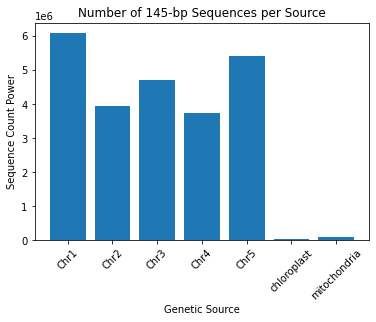

In [ ]:
# number of sequences 

fig = plt.figure()
fig.patch.set_facecolor('white')

x = df_starr.groupby("chromosome").count().iloc[:,0]

plt.bar(x.index, x)

plt.xticks(rotation=45)
plt.xlabel("Genetic Source")
plt.ylabel("Sequence Count Power")
plt.title("Number of 145-bp Sequences per Source")

plt.show()

In [ ]:
x  # counts of sequences per genetic source, plotted above

chromosome
Chr1            6085506
Chr2            3939629
Chr3            4691938
Chr4            3716983
Chr5            5395072
chloroplast       30867
mitochondria      73356
Name: start_coord, dtype: int64

In [ ]:
# get list of total symbols used for NTs

symbols = sorted(list(set("".join(df_starr.sequence))))

In [ ]:
symbols  # not our usual ATCG...

['A', 'C', 'D', 'G', 'K', 'M', 'N', 'R', 'S', 'T', 'W', 'Y']

In [ ]:
# get nucleotide counts for each source
sources = x.index.tolist()  # ['Chr1', 'Chr2', 'Chr3', 'Chr4', 'Chr5', 'chloroplast', 'mitochondria']

sources_freq = []
for item in sources:
  df_spec = df_starr[df_starr.chromosome == item]
  sqnc = "".join(df_spec["sequence"].str[0:5])+df_spec["sequence"].tolist()[-1][5:]
  print(item, "is", len(sqnc), "nucleotides long")
  nts_freq = []
  for symbol in symbols:
    nts_freq.append(sqnc.count(symbol))
  sources_freq.append(nts_freq)

Chr1 is 30427670 nucleotides long
Chr2 is 19698285 nucleotides long
Chr3 is 23459830 nucleotides long
Chr4 is 18585055 nucleotides long
Chr5 is 26975500 nucleotides long
chloroplast is 154475 nucleotides long
mitochondria is 366920 nucleotides long


In [ ]:
counts_df = pd.DataFrame(sources_freq, columns=symbols, index=sources)
counts_df

,A,C,D,G,K,M,N,R,S,T,W,Y
Chr1,9709674,5435374,0,5421150,53,76,163958,36,30,9697113,124,82
Chr2,6315640,3542973,0,3520763,10,5,2506,7,3,6316348,18,12
Chr3,7484757,4258333,0,4262704,0,2,5966,4,1,7448059,2,2
Chr4,5940546,3371349,1,3356090,0,1,3030,0,0,5914038,0,0
Chr5,8621974,4832252,0,4858759,0,0,10278,0,0,8652237,0,0
chloroplast,48545,28495,0,27570,0,0,0,0,0,49865,0,0
mitochondria,102463,82661,0,81608,0,0,0,0,0,100188,0,0


Please refer to the following dictionary to read about what each of the above symbols mean: https://en.wikipedia.org/wiki/Nucleic_acid_sequence#Notation

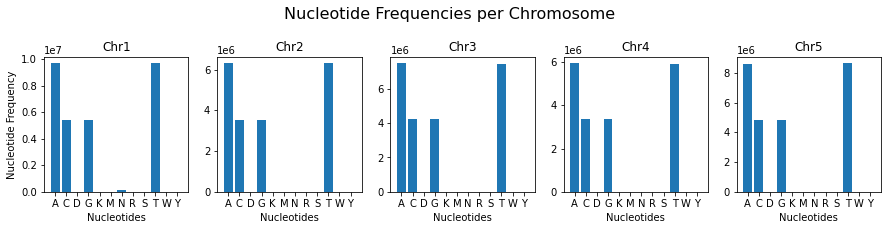

In [ ]:
# nucleotide frequency per chromosome

fig, axs = plt.subplots(1, 5, figsize=(15,3))

fig.patch.set_facecolor('white')

for i in range(5):
    axs[i].bar(symbols, sources_freq[i])

    axs[i].set_title(sources[i])

    if i == 0:
        axs[i].set(ylabel='Nucleotide Frequency')
    axs[i].set(xlabel='Nucleotides')

# fig.tight_layout()
fig.suptitle('Nucleotide Frequencies per Chromosome', fontsize=16)
plt.subplots_adjust(top=0.75)
fig.show()

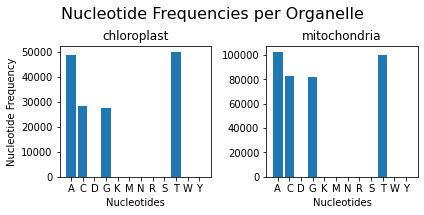

In [ ]:
# nucleotide frequency per organelle

fig, axs = plt.subplots(1, 2, figsize=(6,3))

fig.patch.set_facecolor('white')

for i in range(2):
    axs[i].bar(symbols, sources_freq[i+5])

    axs[i].set_title(sources[i+5])

    if i == 0:
        axs[i].set(ylabel='Nucleotide Frequency')
    axs[i].set(xlabel='Nucleotides')

fig.tight_layout()
fig.suptitle('Nucleotide Frequencies per Organelle', fontsize=16)
plt.subplots_adjust(top=0.8)
fig.show()

In [ ]:
# count number of each NT in a sequence
nts = ["A", "T", "C", "G"]
for nt in nts:
    df_starr[nt] = df_starr["sequence"].str.count(nt)

In [ ]:
df_starr.head()

,chromosome,start_coord,end_coord,sequence,raw_control_coverage,raw_treatment_coverage,norm_control_coverage,norm_treatment_coverage,A,T,C,G
0,Chr1,0,145,CCCTAAACCCTAAACCCTAAACCCTAAACCTCTGAATCCTTAATCC...,15,46,0.34,1.47,49,41,45,10
1,Chr1,5,150,AACCCTAAACCCTAAACCCTAAACCTCTGAATCCTTAATCCCTAAA...,15,46,0.34,1.47,50,42,42,11
2,Chr1,10,155,TAAACCCTAAACCCTAAACCTCTGAATCCTTAATCCCTAAATCCCT...,15,46,0.34,1.47,51,44,39,11
3,Chr1,15,160,CCTAAACCCTAAACCTCTGAATCCTTAATCCCTAAATCCCTAAATC...,16,46,0.36,1.47,49,47,38,11
4,Chr1,20,165,ACCCTAAACCTCTGAATCCTTAATCCCTAAATCCCTAAATCTTTAA...,16,46,0.36,1.47,47,49,37,12


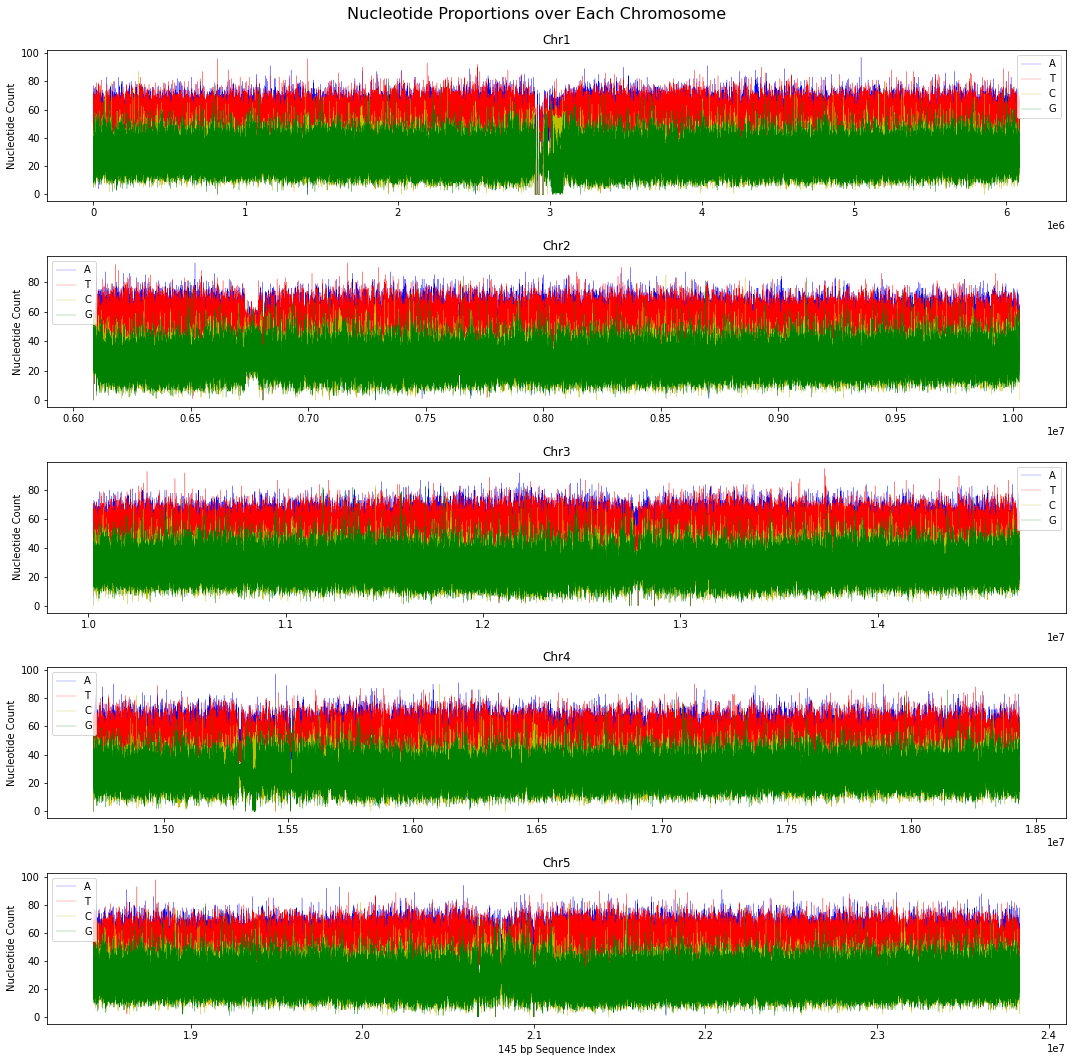

In [ ]:
# show number of each NT in sliding window over sequence
fig, axs = plt.subplots(5, 1, figsize=(15,15))

fig.patch.set_facecolor('white')

for i in range(5):
  source = sources[i]
  df_spec = df_starr[df_starr.chromosome == source].iloc[::29, :]  # keep only every 29th row so no overlaps

  axs[i].plot(df_spec["A"], "b", linewidth=0.25)
  axs[i].plot(df_spec["T"], "r", linewidth=0.25)
  axs[i].plot(df_spec["C"], "y", linewidth=0.25)
  axs[i].plot(df_spec["G"], "g", linewidth=0.25)

  axs[i].set_title(sources[i])

  if i == 4:
    axs[i].set(xlabel='145 bp Sequence Index')
  axs[i].set(ylabel='Nucleotide Count')
  

  axs[i].legend(["A", "T", "C", "G"])
  # x1,x2,y1,y2 = plt.axis()  
  # plt.axis((x1,x2,y1,105))
  # axs[i].title("Distribution of Each Nucleotide Across Genome")

fig.tight_layout()
fig.suptitle('Nucleotide Proportions over Each Chromosome', fontsize=16)
plt.subplots_adjust(top=0.94)
plt.show()

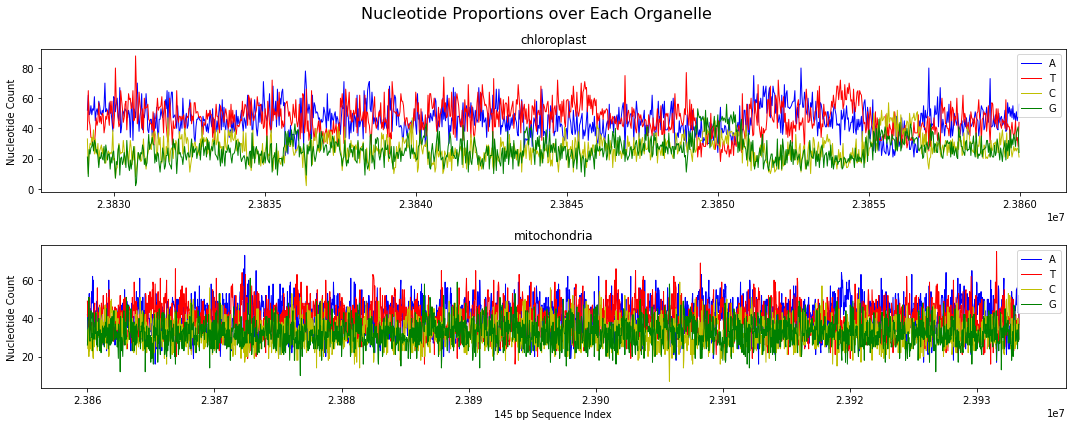

In [ ]:
# show number of each NT in sliding window over sequence
fig, axs = plt.subplots(2, 1, figsize=(15,6))

fig.patch.set_facecolor('white')

for i in range(2):
  source = sources[i+5]
  df_spec = df_starr[df_starr.chromosome == source].iloc[::29, :]  # keep only every 29th row so no overlaps

  axs[i].plot(df_spec["A"], "b", linewidth=1)
  axs[i].plot(df_spec["T"], "r", linewidth=1)
  axs[i].plot(df_spec["C"], "y", linewidth=1)
  axs[i].plot(df_spec["G"], "g", linewidth=1)

  axs[i].set_title(sources[i+5])

  if i == 1:
    axs[i].set(xlabel='145 bp Sequence Index')
  axs[i].set(ylabel='Nucleotide Count')

  axs[i].legend(["A", "T", "C", "G"])
  # x1,x2,y1,y2 = plt.axis()  
  # plt.axis((x1,x2,y1,105))
  # axs[i].title("Distribution of Each Nucleotide Across Genome")

fig.tight_layout()
fig.suptitle('Nucleotide Proportions over Each Organelle', fontsize=16)
plt.subplots_adjust(top=0.88)
plt.show()

In [ ]:
# does it make sense to remove rows that have symbols other than A, T, C, and G?

chromosomes = ["Chr"+str(i) for i in range(1,6)]
df_chromosomes = df_starr[df_starr.chromosome.isin(chromosomes)]
print("The number of all chromosomal rows is", df_chromosomes.shape[0])

The number of all chromosomal rows is 23829128


In [ ]:
df_chromosomes.sequence.tolist()

['CCCTAAACCCTAAACCCTAAACCCTAAACCTCTGAATCCTTAATCCCTAAATCCCTAAATCTTTAAATCCTACATCCATGAATCCCTAAATACCTAATTCCCTAAACCCGAAACCGGTTTCTCTGGTTGAAAATCATTGTGTATA',
 'AACCCTAAACCCTAAACCCTAAACCTCTGAATCCTTAATCCCTAAATCCCTAAATCTTTAAATCCTACATCCATGAATCCCTAAATACCTAATTCCCTAAACCCGAAACCGGTTTCTCTGGTTGAAAATCATTGTGTATATAATG',
 'TAAACCCTAAACCCTAAACCTCTGAATCCTTAATCCCTAAATCCCTAAATCTTTAAATCCTACATCCATGAATCCCTAAATACCTAATTCCCTAAACCCGAAACCGGTTTCTCTGGTTGAAAATCATTGTGTATATAATGATAAT',
 'CCTAAACCCTAAACCTCTGAATCCTTAATCCCTAAATCCCTAAATCTTTAAATCCTACATCCATGAATCCCTAAATACCTAATTCCCTAAACCCGAAACCGGTTTCTCTGGTTGAAAATCATTGTGTATATAATGATAATTTTAT',
 'ACCCTAAACCTCTGAATCCTTAATCCCTAAATCCCTAAATCTTTAAATCCTACATCCATGAATCCCTAAATACCTAATTCCCTAAACCCGAAACCGGTTTCTCTGGTTGAAAATCATTGTGTATATAATGATAATTTTATCGTTT',
 'AAACCTCTGAATCCTTAATCCCTAAATCCCTAAATCTTTAAATCCTACATCCATGAATCCCTAAATACCTAATTCCCTAAACCCGAAACCGGTTTCTCTGGTTGAAAATCATTGTGTATATAATGATAATTTTATCGTTTTTATG',
 'TCTGAATCCTTAATCCCTAAATCCCTAAATCTTTAAATCCTACATCCATGAATCCCTAAATACCTAATTCCCTAAACCCGAAACCGGTTTCTCTGGTT

In [ ]:
# remove all good NTs from string for comparison in the next cell
# this is a stupid way of doing it but I couldn't find anything better lol
df_chromosomes.loc[:,"sequence"] = df_chromosomes.sequence.str.replace('A', '')
df_chromosomes.loc[:,"sequence"] = df_chromosomes.sequence.str.replace('T', '')
df_chromosomes.loc[:,"sequence"] = df_chromosomes.sequence.str.replace('C', '')
df_chromosomes.loc[:,"sequence"] = df_chromosomes.sequence.str.replace('G', '')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
df_chromosomes

,chromosome,start_coord,end_coord,sequence,raw_control_coverage,raw_treatment_coverage,norm_control_coverage,norm_treatment_coverage,A,T,C,G
0,Chr1,0,145,,15,46,0.34,1.47,49,41,45,10
1,Chr1,5,150,,15,46,0.34,1.47,50,42,42,11
2,Chr1,10,155,,15,46,0.34,1.47,51,44,39,11
3,Chr1,15,160,,16,46,0.36,1.47,49,47,38,11
4,Chr1,20,165,,16,46,0.36,1.47,47,49,37,12
...,...,...,...,...,...,...,...,...,...,...,...,...
23829123,Chr5,26975335,26975480,,29,14,0.66,0.45,44,48,13,40
23829124,Chr5,26975340,26975485,,27,13,0.62,0.41,45,47,12,41
23829125,Chr5,26975345,26975490,,26,13,0.59,0.41,43,49,12,41
23829126,Chr5,26975350,26975495,,25,12,0.57,0.38,41,51,10,43


In [ ]:
odds = [s for s in symbols if s not in nts]  # weirdos

df_strange = df_chromosomes[df_chromosomes.sequence != ""]

In [ ]:
print("The number of rows to remove due to strange characters is", df_strange.shape[0])

The number of rows to remove due to strange characters is 41817


In [ ]:
41817/23829128  # proportion of rows we'd have to get rid of

0.0017548690829139867

In [ ]:
(41817/23829128)*100  # percentage of rows we'd have to get rid of

0.17548690829139868

In [ ]:
100-(41817/23829128)*100  # percentage of rows we'd have to get to keep

99.8245130917086

We would be able to keep 99.82% of data if we got rid of all the sequences that have non ATCG.

---
## Final four columns exploration
### Figuring out Ratio

Because of some really low-coverage areas, we are forced to test some different filtering methods on the data. 

In [ ]:
df_starr

,chromosome,start_coord,end_coord,sequence,raw_control_coverage,raw_treatment_coverage,norm_control_coverage,norm_treatment_coverage,A,T,C,G
0,Chr1,0,145,CCCTAAACCCTAAACCCTAAACCCTAAACCTCTGAATCCTTAATCC...,15,46,0.34,1.47,49,41,45,10
1,Chr1,5,150,AACCCTAAACCCTAAACCCTAAACCTCTGAATCCTTAATCCCTAAA...,15,46,0.34,1.47,50,42,42,11
2,Chr1,10,155,TAAACCCTAAACCCTAAACCTCTGAATCCTTAATCCCTAAATCCCT...,15,46,0.34,1.47,51,44,39,11
3,Chr1,15,160,CCTAAACCCTAAACCTCTGAATCCTTAATCCCTAAATCCCTAAATC...,16,46,0.36,1.47,49,47,38,11
4,Chr1,20,165,ACCCTAAACCTCTGAATCCTTAATCCCTAAATCCCTAAATCTTTAA...,16,46,0.36,1.47,47,49,37,12
...,...,...,...,...,...,...,...,...,...,...,...,...
23933346,mitochondria,366755,366900,TTTGCCACCTCCCTCAACAACCTGACCTAGTCGGCCCATCCTCCGA...,393,295,8.95,9.41,36,46,39,24
23933347,mitochondria,366760,366905,CACCTCCCTCAACAACCTGACCTAGTCGGCCCATCCTCCGAGGTTT...,383,286,8.72,9.12,37,43,40,25
23933348,mitochondria,366765,366910,CCCTCAACAACCTGACCTAGTCGGCCCATCCTCCGAGGTTTTTGTT...,377,283,8.59,9.02,38,43,37,27
23933349,mitochondria,366770,366915,AACAACCTGACCTAGTCGGCCCATCCTCCGAGGTTTTTGTTCTGCT...,367,277,8.36,8.83,42,42,34,27


In [ ]:
df_starr.describe()[["raw_control_coverage", "raw_treatment_coverage"]]

,raw_control_coverage,raw_treatment_coverage
count,2.393335e+07,2.393335e+07
mean,1.077848e+02,7.692439e+01
std,1.170868e+03,9.556892e+02
min,0.000000e+00,0.000000e+00
25%,2.100000e+01,7.000000e+00
50%,6.200000e+01,3.300000e+01
75%,9.900000e+01,7.000000e+01
max,1.178320e+05,1.186440e+05


### Raw Control Coverage


In [ ]:
print(df_starr.raw_control_coverage.min())
print(df_starr.raw_control_coverage.max())

0
117832


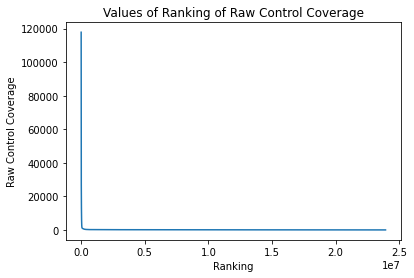

In [ ]:
# plot how the coverage values change

highest_cov = sorted(df_starr.raw_control_coverage.tolist(), reverse=True)

fig = plt.figure()
fig.patch.set_facecolor('white')

plt.plot(highest_cov)
plt.xlabel("Ranking")
plt.ylabel("Raw Control Coverage")
plt.title("Values of Ranking of Raw Control Coverage")
plt.show()

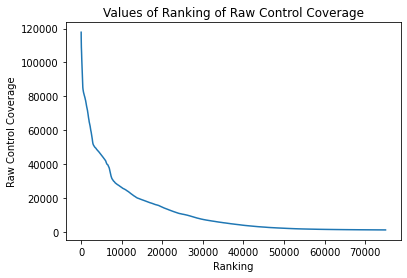

In [ ]:
# plot only the top 75000

fig = plt.figure()
fig.patch.set_facecolor('white')

plt.plot(sorted(df_starr.raw_control_coverage.tolist(), reverse=True)[:75000])
plt.xlabel("Ranking")
plt.ylabel("Raw Control Coverage")
plt.title("Values of Ranking of Raw Control Coverage")
plt.show()

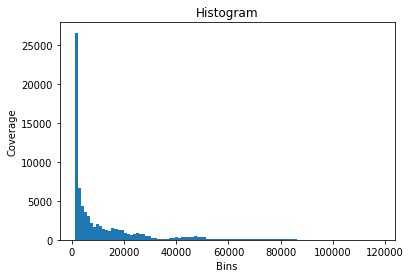

In [ ]:
# histogram of only highest 75000 coverage rows

fig = plt.figure()
fig.patch.set_facecolor('white')

plt.hist(highest_cov[:75000], bins=100)
plt.xlabel("Bins")
plt.ylabel("Coverage")
plt.title("Histogram")
plt.show()

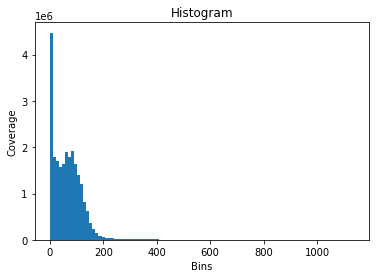

In [ ]:
# histogram of all but the highest 75000 coverage rows

fig = plt.figure()
fig.patch.set_facecolor('white')

plt.hist(highest_cov[75000:], bins=100)
plt.xlabel("Bins")
plt.ylabel("Coverage")
plt.title("Histogram")
plt.show()

In [ ]:
# how many zeroes are there?

print("Number of Zeroes:", highest_cov.count(0))
print("Total rows:", len(highest_cov))
print()
print("Proportion:", highest_cov.count(0)/len(highest_cov))
print("Percentage:", str((highest_cov.count(0)/len(highest_cov))*100)+"%")

Number of Zeroes: 1579861
Total rows: 23933351

Proportion: 0.06601085656580226
Percentage: 6.601085656580226%


In [ ]:
# get rid of everything that has coverage > 200
smaller_cov = list(np.array(highest_cov)[np.array(highest_cov) <= 200])

In [ ]:
len(smaller_cov)/len(highest_cov)  # if it's less than 200, that makes up >97%

0.9743469270141067

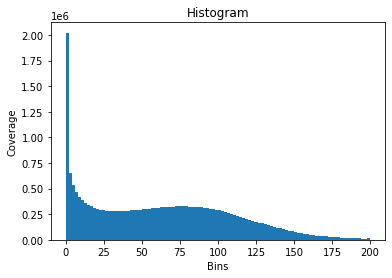

In [ ]:
# histogram of only <= 200 coverage

fig = plt.figure()
fig.patch.set_facecolor('white')

plt.hist(smaller_cov, bins=100)
plt.xlabel("Bins")
plt.ylabel("Coverage")
plt.title("Histogram")
plt.show()

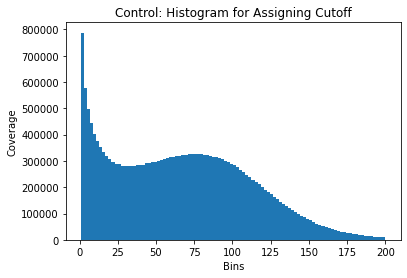

In [ ]:
# histogram of only cutoff>=x>=200 coverage

cutoff = 1

fig = plt.figure()
fig.patch.set_facecolor('white')

plt.hist(list(np.array(smaller_cov)[np.array(smaller_cov)>=cutoff]), bins=100)
plt.xlabel("Bins")
plt.ylabel("Coverage")
plt.title("Control: Histogram for Assigning Cutoff")
plt.show()

### Treatment Control Coverage

In [ ]:
print(df_starr.raw_treatment_coverage.min())
print(df_starr.raw_treatment_coverage.max())

0
118644


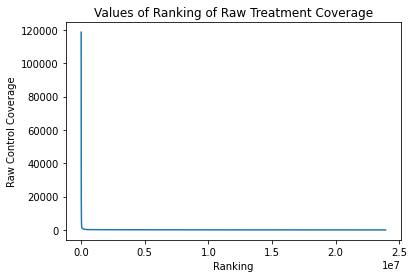

In [ ]:
# plot how the coverage values change

highest_cov = sorted(df_starr.raw_treatment_coverage.tolist(), reverse=True)

fig = plt.figure()
fig.patch.set_facecolor('white')

plt.plot(highest_cov)
plt.xlabel("Ranking")
plt.ylabel("Raw Control Coverage")
plt.title("Values of Ranking of Raw Treatment Coverage")
plt.show()

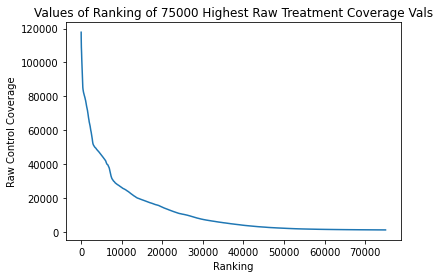

In [ ]:
# plot only the top 75000

fig = plt.figure()
fig.patch.set_facecolor('white')

plt.plot(sorted(df_starr.raw_control_coverage.tolist(), reverse=True)[:75000])
plt.xlabel("Ranking")
plt.ylabel("Raw Control Coverage")
plt.title("Values of Ranking of 75000 Highest Raw Treatment Coverage Vals")
plt.show()

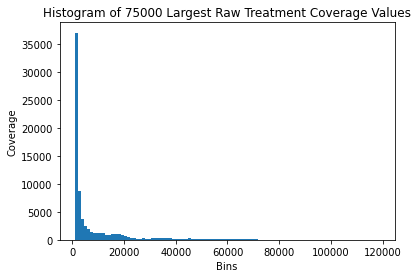

In [ ]:
# histogram of only highest 75000 coverage rows

fig = plt.figure()
fig.patch.set_facecolor('white')

plt.hist(highest_cov[:75000], bins=100)
plt.xlabel("Bins")
plt.ylabel("Coverage")
plt.title("Histogram of 75000 Largest Raw Treatment Coverage Values")
plt.show()

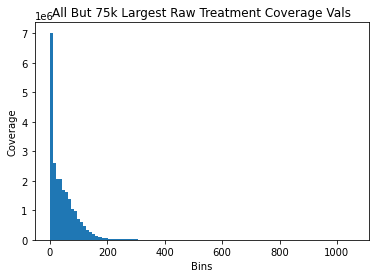

In [ ]:
# histogram of all but the highest 75000 coverage rows

fig = plt.figure()
fig.patch.set_facecolor('white')

plt.hist(highest_cov[75000:], bins=100)
plt.xlabel("Bins")
plt.ylabel("Coverage")
plt.title("All But 75k Largest Raw Treatment Coverage Vals")
plt.show()

In [ ]:
# how many zeroes are there?

print("Number of Zeroes:", highest_cov.count(0))
print("Total rows:", len(highest_cov))
print()
print("Proportion:", highest_cov.count(0)/len(highest_cov))
print("Percentage:", str((highest_cov.count(0)/len(highest_cov))*100)+"%")

Number of Zeroes: 2330243
Total rows: 23933351

Proportion: 0.09736384177877974
Percentage: 9.736384177877975%


In [ ]:
# get rid of everything that has coverage > 300
smaller_cov = list(np.array(highest_cov)[np.array(highest_cov) <= 200])

In [ ]:
len(smaller_cov)/len(highest_cov)  # if it's less than 200, that makes up >98%

0.9780135259788736

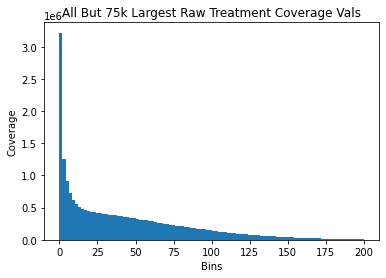

In [ ]:
# histogram of only <= 200 coverage

fig = plt.figure()
fig.patch.set_facecolor('white')

plt.hist(smaller_cov, bins=100)
plt.xlabel("Bins")
plt.ylabel("Coverage")
plt.title("All But 75k Largest Raw Treatment Coverage Vals")
plt.show()

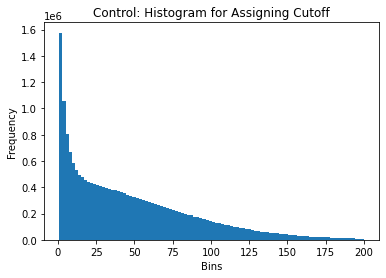

In [ ]:
# histogram of only cutoff>=x>=200 coverage

cutoff = 1

fig = plt.figure()
fig.patch.set_facecolor('white')

plt.hist(list(np.array(smaller_cov)[np.array(smaller_cov)>=cutoff]), bins=100)
plt.xlabel("Bins")
plt.ylabel("Frequency")
plt.title("Control: Histogram for Assigning Cutoff")
plt.show()

## Test Creation of Target Column and Visualize Distribution 

In [ ]:
# remove raw control coverage <10, remove raw treatment coverage <1
df_starr.head()

,chromosome,start_coord,end_coord,sequence,raw_control_coverage,raw_treatment_coverage,norm_control_coverage,norm_treatment_coverage,A,T,C,G
0,Chr1,0,145,CCCTAAACCCTAAACCCTAAACCCTAAACCTCTGAATCCTTAATCC...,15,46,0.34,1.47,49,41,45,10
1,Chr1,5,150,AACCCTAAACCCTAAACCCTAAACCTCTGAATCCTTAATCCCTAAA...,15,46,0.34,1.47,50,42,42,11
2,Chr1,10,155,TAAACCCTAAACCCTAAACCTCTGAATCCTTAATCCCTAAATCCCT...,15,46,0.34,1.47,51,44,39,11
3,Chr1,15,160,CCTAAACCCTAAACCTCTGAATCCTTAATCCCTAAATCCCTAAATC...,16,46,0.36,1.47,49,47,38,11
4,Chr1,20,165,ACCCTAAACCTCTGAATCCTTAATCCCTAAATCCCTAAATCTTTAA...,16,46,0.36,1.47,47,49,37,12


In [ ]:
df_starr.shape

(23933351, 12)

In [ ]:
df_starr[(df_starr.raw_control_coverage > 30) & (df_starr.raw_treatment_coverage > 15)].shape

(15251469, 12)

In [ ]:
df_final = df_starr[(df_starr.raw_control_coverage > 30) & (df_starr.raw_treatment_coverage > 15)]

In [ ]:
df_final

,chromosome,start_coord,end_coord,sequence,raw_control_coverage,raw_treatment_coverage,norm_control_coverage,norm_treatment_coverage,A,T,C,G
689,Chr1,3445,3590,TAATACTACTCGGTTTACTACATGAAATTTCATACCATCAATTGTT...,33,25,0.75,0.80,64,46,20,15
690,Chr1,3450,3595,CTACTCGGTTTACTACATGAAATTTCATACCATCAATTGTTTTAAT...,33,25,0.75,0.80,61,47,21,16
691,Chr1,3455,3600,CGGTTTACTACATGAAATTTCATACCATCAATTGTTTTAATAATCT...,35,28,0.80,0.89,61,49,19,16
692,Chr1,3460,3605,TACTACATGAAATTTCATACCATCAATTGTTTTAATAATCTTTAAA...,35,28,0.80,0.89,64,47,19,15
693,Chr1,3465,3610,CATGAAATTTCATACCATCAATTGTTTTAATAATCTTTAAAATTGT...,35,28,0.80,0.89,63,46,20,16
...,...,...,...,...,...,...,...,...,...,...,...,...
23933346,mitochondria,366755,366900,TTTGCCACCTCCCTCAACAACCTGACCTAGTCGGCCCATCCTCCGA...,393,295,8.95,9.41,36,46,39,24
23933347,mitochondria,366760,366905,CACCTCCCTCAACAACCTGACCTAGTCGGCCCATCCTCCGAGGTTT...,383,286,8.72,9.12,37,43,40,25
23933348,mitochondria,366765,366910,CCCTCAACAACCTGACCTAGTCGGCCCATCCTCCGAGGTTTTTGTT...,377,283,8.59,9.02,38,43,37,27
23933349,mitochondria,366770,366915,AACAACCTGACCTAGTCGGCCCATCCTCCGAGGTTTTTGTTCTGCT...,367,277,8.36,8.83,42,42,34,27


In [ ]:
df_final["target"] = np.log2(df_final.norm_control_coverage/df_final.norm_treatment_coverage)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_final

,chromosome,start_coord,end_coord,sequence,raw_control_coverage,raw_treatment_coverage,norm_control_coverage,norm_treatment_coverage,A,T,C,G,target
689,Chr1,3445,3590,TAATACTACTCGGTTTACTACATGAAATTTCATACCATCAATTGTT...,33,25,0.75,0.80,64,46,20,15,-0.093109
690,Chr1,3450,3595,CTACTCGGTTTACTACATGAAATTTCATACCATCAATTGTTTTAAT...,33,25,0.75,0.80,61,47,21,16,-0.093109
691,Chr1,3455,3600,CGGTTTACTACATGAAATTTCATACCATCAATTGTTTTAATAATCT...,35,28,0.80,0.89,61,49,19,16,-0.153805
692,Chr1,3460,3605,TACTACATGAAATTTCATACCATCAATTGTTTTAATAATCTTTAAA...,35,28,0.80,0.89,64,47,19,15,-0.153805
693,Chr1,3465,3610,CATGAAATTTCATACCATCAATTGTTTTAATAATCTTTAAAATTGT...,35,28,0.80,0.89,63,46,20,16,-0.153805
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23933346,mitochondria,366755,366900,TTTGCCACCTCCCTCAACAACCTGACCTAGTCGGCCCATCCTCCGA...,393,295,8.95,9.41,36,46,39,24,-0.072307
23933347,mitochondria,366760,366905,CACCTCCCTCAACAACCTGACCTAGTCGGCCCATCCTCCGAGGTTT...,383,286,8.72,9.12,37,43,40,25,-0.064706
23933348,mitochondria,366765,366910,CCCTCAACAACCTGACCTAGTCGGCCCATCCTCCGAGGTTTTTGTT...,377,283,8.59,9.02,38,43,37,27,-0.070469
23933349,mitochondria,366770,366915,AACAACCTGACCTAGTCGGCCCATCCTCCGAGGTTTTTGTTCTGCT...,367,277,8.36,8.83,42,42,34,27,-0.078910


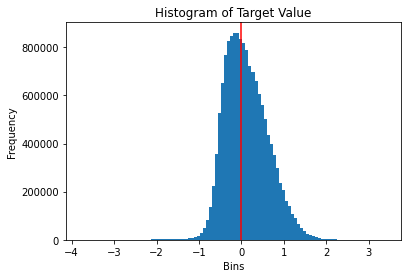

In [ ]:
# histogram of target_values

fig = plt.figure()
fig.patch.set_facecolor('white')

plt.hist(df_final[df_final.chromosome.isin(["Chr"+str(i) for i in range(1,6)])].target, bins=100)
plt.axvline(0, color="red")
plt.xlabel("Bins")
plt.ylabel("Frequency")
plt.title("Histogram of Target Value")
plt.show()

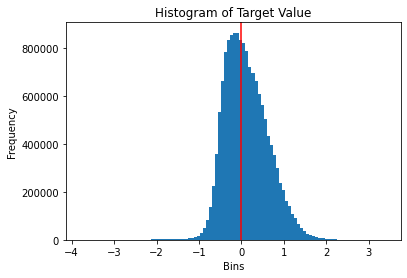

In [ ]:
# histogram of target_values

fig = plt.figure()
fig.patch.set_facecolor('white')

plt.hist(df_final.target, bins=100)
plt.axvline(0, color="red")
plt.xlabel("Bins")
plt.ylabel("Frequency")
plt.title("Histogram of Target Value")
plt.show()

In [ ]:
df_final = df_final[df_final.chromosome.isin(["Chr"+str(i) for i in range(1,6)])]

In [ ]:
np.mean(df_final.target)

0.24527552886432621

In [ ]:
np.median(df_final.target)

0.16745674585156273

In [ ]:
np.std(df_final.target)

0.7841837246216421

In [ ]:
from scipy import stats

stats.mode(df_final.target)

ModeResult(mode=array([0.]), count=array([124692]))

In [ ]:
np.max(df_final.target)

5.035623909730721

In [ ]:
np.min(df_final.target)

-5.629990075651099

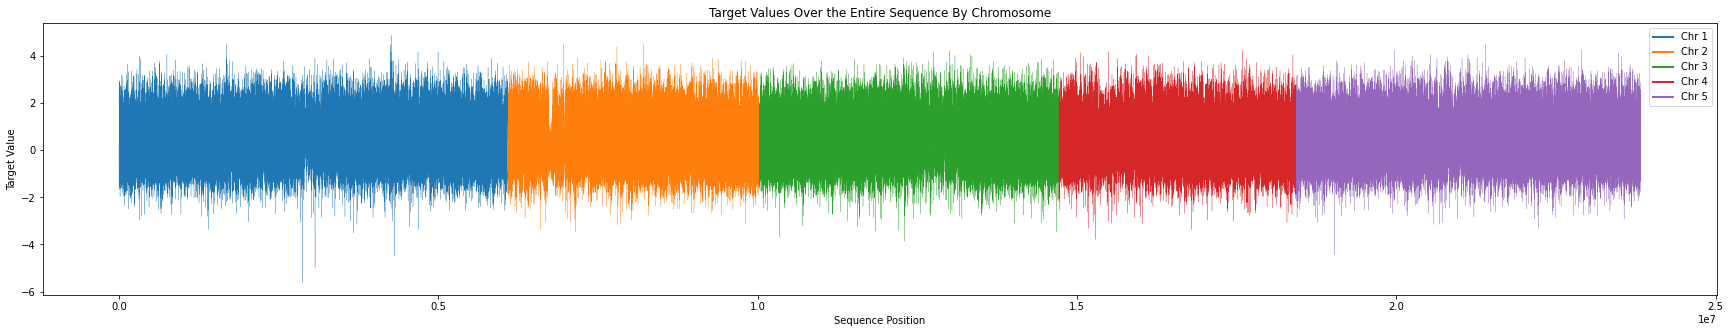

In [ ]:
# show number of each NT in sliding window over sequence
fig, axs = plt.subplots(figsize=(30,5))

fig.patch.set_facecolor('white')

df_skips = df_final.iloc[::29, :]

plt.plot(df_skips[df_skips.chromosome=="Chr1"].target, linewidth=0.25, label="Chr 1")  # selected every nth row
plt.plot(df_skips[df_skips.chromosome=="Chr2"].target, linewidth=0.25, label="Chr 2")  # selected every nth row
plt.plot(df_skips[df_skips.chromosome=="Chr3"].target, linewidth=0.25, label="Chr 3")  # selected every nth row
plt.plot(df_skips[df_skips.chromosome=="Chr4"].target, linewidth=0.25, label="Chr 4")  # selected every nth row
plt.plot(df_skips[df_skips.chromosome=="Chr5"].target, linewidth=0.25, label="Chr 5")  # selected every nth row

leg = plt.legend()

# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(2.0)

plt.xlabel("Sequence Position")
plt.ylabel("Target Value")
plt.title("Target Values Over the Entire Sequence By Chromosome")
plt.show()

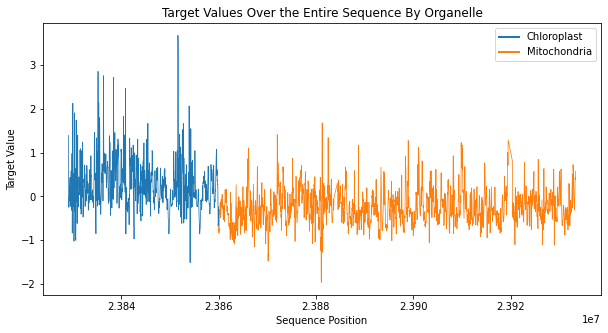

In [ ]:
# show number of each NT in sliding window over sequence
fig, axs = plt.subplots(figsize=(10,5))

fig.patch.set_facecolor('white')

df_skips = df_final.iloc[::29, :]

plt.plot(df_skips[df_skips.chromosome=="chloroplast"].target, linewidth=0.75, label="Chloroplast")  # selected every nth row
plt.plot(df_skips[df_skips.chromosome=="mitochondria"].target, linewidth=0.75, label="Mitochondria")  # selected every nth row

leg = plt.legend()

# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(2.0)

plt.xlabel("Sequence Position")
plt.ylabel("Target Value")
plt.title("Target Values Over the Entire Sequence By Organelle")
plt.show()

## Correlation Maps

### With Organelles

In [ ]:
# load in the first 10 rows of each dataframe to get oriented

t0 = time.time()
df_starr = pd.read_csv('data/raw/athal_starr_hidra.tsv', sep="\t", header=None)
df_istarr = pd.read_csv('data/raw/athal_istarr_hidra.tsv', sep="\t", header=None)
print(time.time()-t0)

156.84777665138245


In [ ]:
column_names = ["chromosome", 
                "start_coord", 
                "end_coord", 
                "sequence", 
                "raw_control_coverage", 
                "raw_treatment_coverage", 
                "norm_control_coverage", 
                "norm_treatment_coverage"]

df_starr.columns = column_names
df_istarr.columns = column_names

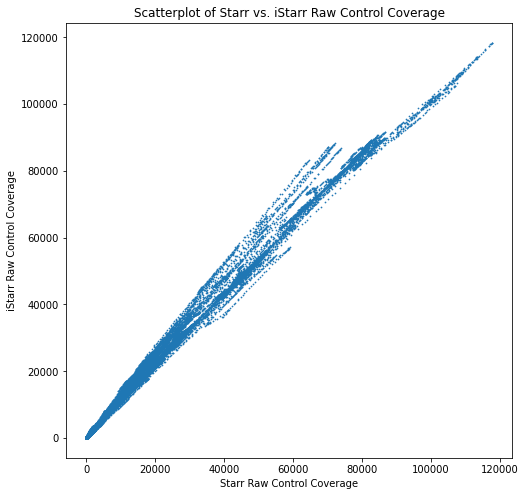

In [ ]:
# scatterplot of raw control coverages

fig = plt.figure(figsize=(8,8))
fig.patch.set_facecolor('white')

plt.scatter(df_starr.raw_control_coverage, df_istarr.raw_control_coverage, s=0.5)
plt.xlabel("Starr Raw Control Coverage")
plt.ylabel("iStarr Raw Control Coverage")
plt.title("Scatterplot of Starr vs. iStarr Raw Control Coverage")
plt.show()

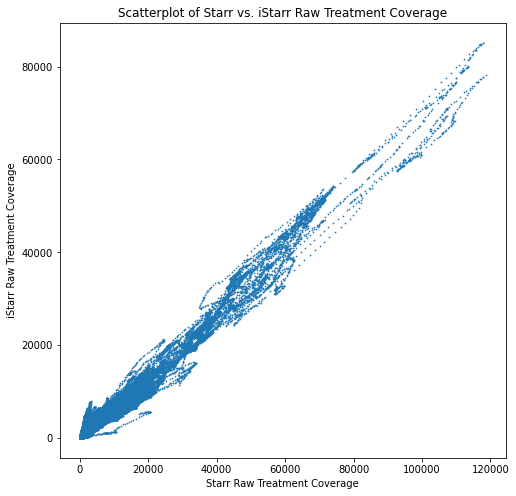

In [ ]:
# scatterplot of raw treatment coverages

fig = plt.figure(figsize=(8,8))
fig.patch.set_facecolor('white')

plt.scatter(df_starr.raw_treatment_coverage, df_istarr.raw_treatment_coverage, s=0.5)
plt.xlabel("Starr Raw Treatment Coverage")
plt.ylabel("iStarr Raw Treatment Coverage")
plt.title("Scatterplot of Starr vs. iStarr Raw Treatment Coverage")
plt.show()

### Without Organelles

In [ ]:
# keep rows with "Chr" in the chromosome column
df_starr = df_starr[df_starr.chromosome.isin(["Chr"+str(i) for i in range(1,6)])]  
df_istarr = df_istarr[df_istarr.chromosome.isin(["Chr"+str(i) for i in range(1,6)])]

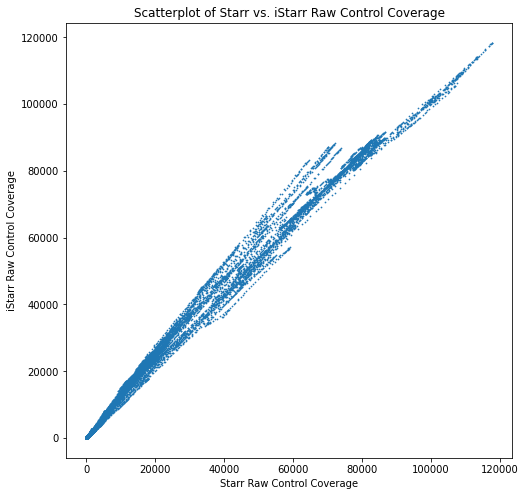

In [ ]:
# scatterplot of raw control coverages

fig = plt.figure(figsize=(8,8))
fig.patch.set_facecolor('white')

plt.scatter(df_starr.raw_control_coverage, df_istarr.raw_control_coverage, s=0.5)
plt.xlabel("Starr Raw Control Coverage")
plt.ylabel("iStarr Raw Control Coverage")
plt.title("Scatterplot of Starr vs. iStarr Raw Control Coverage")
plt.show()

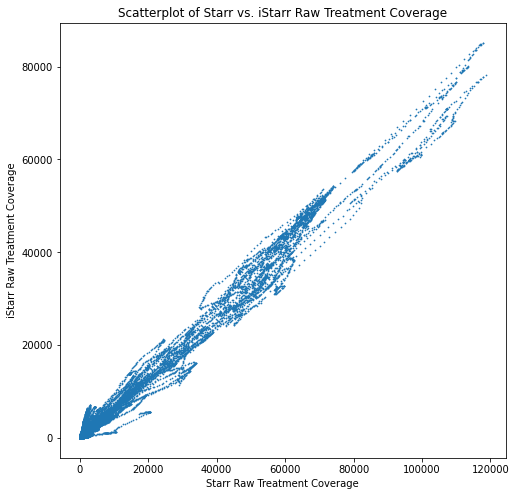

In [ ]:
# scatterplot of raw treatment coverages

fig = plt.figure(figsize=(8,8))
fig.patch.set_facecolor('white')

plt.scatter(df_starr.raw_treatment_coverage, df_istarr.raw_treatment_coverage, s=0.5)
plt.xlabel("Starr Raw Treatment Coverage")
plt.ylabel("iStarr Raw Treatment Coverage")
plt.title("Scatterplot of Starr vs. iStarr Raw Treatment Coverage")
plt.show()